# Expectation Maximisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import norm
from matplotlib.widgets import Slider, Button

### Mixture of Gaussians

$p(y|\theta) = \sum_k \pi_k \cal{N}(y; \mu_k, \Sigma_k)$

$\theta = \{\pi_1, \pi_2, \mu_1, \mu_2, \Sigma_1, \Sigma_2\}$

<IPython.core.display.Javascript object>


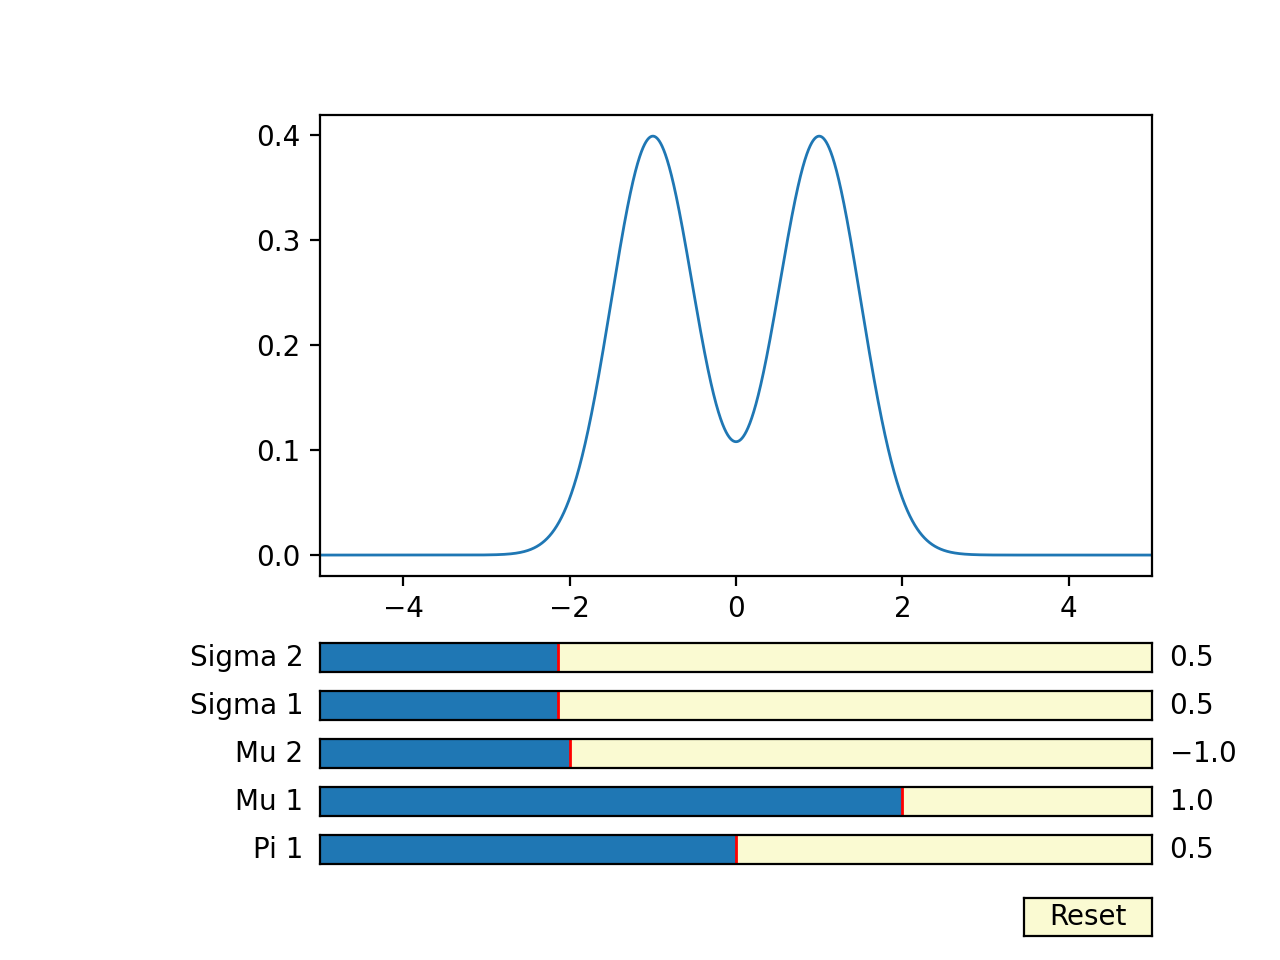

In [2]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.4)
x = np.arange(-5, 5, 0.001)
p1_0 = 0.5
p2_0 = 1-p1_0
m1_0 = 1
m2_0 = -1
s1_0 = 0.5
s2_0 = 0.5

y = p1_0*norm.pdf(x, loc=m1_0, scale=s1_0) + p2_0*norm.pdf(x, loc=m2_0, scale=s2_0)
l, = plt.plot(x, y, lw=1)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axp1 = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axm1 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axm2 = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
axs1 = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axs2 = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)

sp1 = Slider(axp1, 'Pi 1', 0, 1, valinit=p1_0, valstep=0.001)
sm1 = Slider(axm1, 'Mu 1', -2.5, 2.5, valinit=m1_0, valstep=0.1)
sm2 = Slider(axm2, 'Mu 2', -2.5, 2.5, valinit=m2_0, valstep=0.1)
ss1 = Slider(axs1, 'Sigma 1', 0.1, 1.5, valinit=s1_0, valstep=0.1)
ss2 = Slider(axs2, 'Sigma 2', 0.1, 1.5, valinit=s2_0, valstep=0.1)

def update(val):
    p1 = sp1.val
    m1 = sm1.val
    m2 = sm2.val
    s1 = ss1.val
    s2 = ss2.val
    
    l.set_ydata(p1*norm.pdf(x, loc=m1, scale=s1) + (1-p1)*norm.pdf(x, loc=m2, scale=s2))
    fig.canvas.draw_idle()

sp1.on_changed(update)
sm1.on_changed(update)
sm2.on_changed(update)
ss1.on_changed(update)
ss2.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sp1.reset()
    sm1.reset()
    sm2.reset()
    ss1.reset()
    ss2.reset()
button.on_clicked(reset)
    
plt.show()

<IPython.core.display.Javascript object>


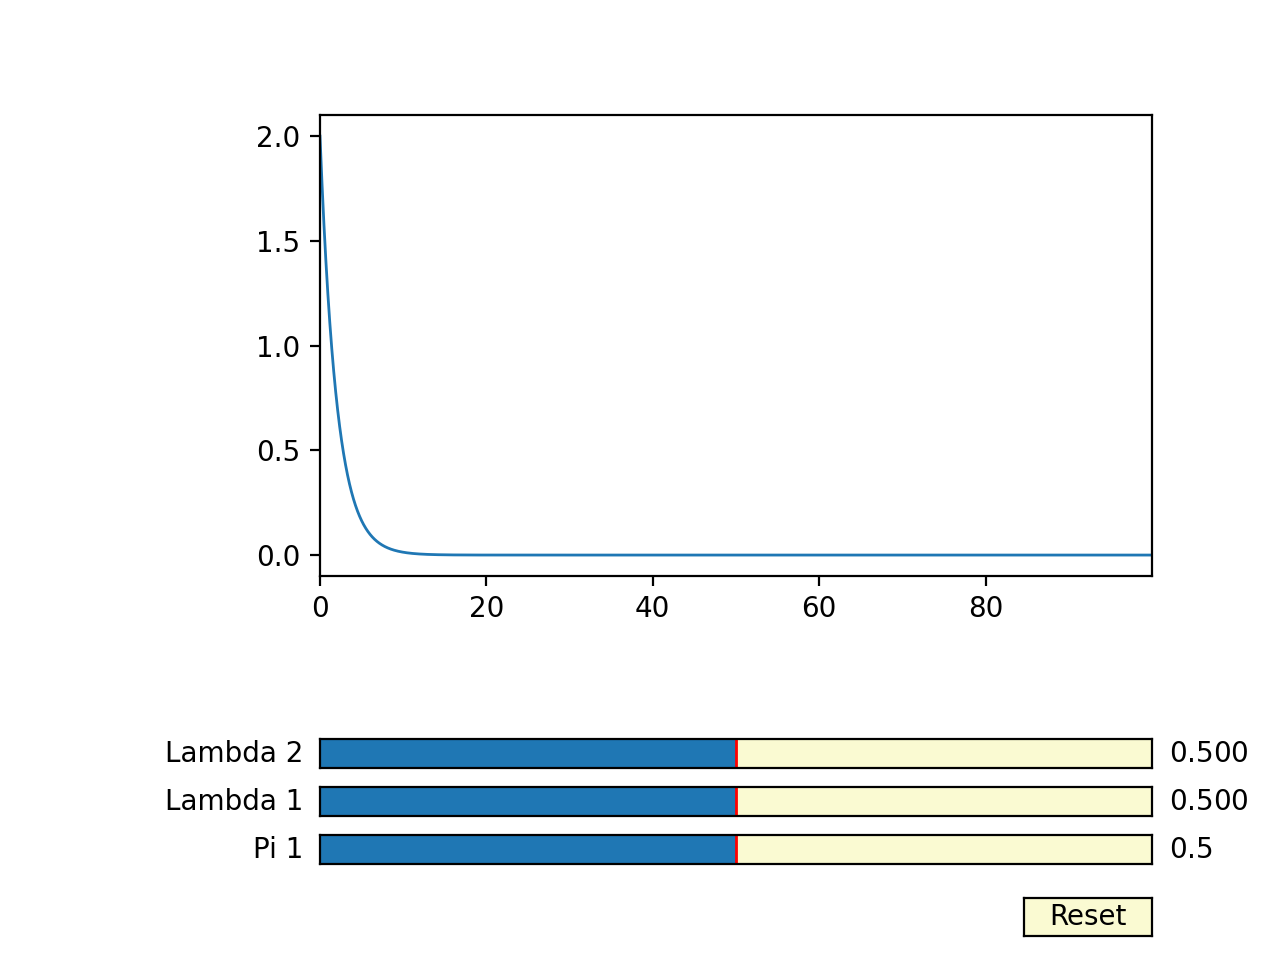

In [6]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.4)
x = np.arange(0, 100, 0.001)
p1_0 = 0.5
l1_0 = 0.5
l2_0 = 0.5

y = p1_0*np.exp(-l1_0*x) / l1_0 + (1-p1_0)*np.exp(-l2_0*x) / l2_0
l, = plt.plot(x, y, lw=1)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axp1 = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axl1 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axl2 = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)

sp1 = Slider(axp1, 'Pi 1', 0, 1, valinit=p1_0, valstep=0.001)
sl1 = Slider(axl1, 'Lambda 1', 0.001, 1, valinit=l1_0, valstep=0.001)
sl2 = Slider(axl2, 'Lambda 2', 0.001, 1, valinit=l2_0, valstep=0.001)

def update(val):
    p1 = sp1.val
    l1 = sl1.val
    l2 = sl2.val
    
    
    l.set_ydata(p1*np.exp(-l1*x) / l1 + (1-p1)*np.exp(-l2*x) / l2)
    fig.canvas.draw_idle()

sp1.on_changed(update)
sl1.on_changed(update)
sl2.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sp1.reset()
    sl1.reset()
    sl2.reset()
button.on_clicked(reset)
    
plt.show()

In [47]:
rho_true = 0.5
lambda0_true = 0.1
lambda1_true = 1
N = 1000
data = np.zeros(N)
labels = np.zeros(N)
for i in range(N):
    n = np.random.uniform()
    if n < rho_true:
        datapoint = np.random.exponential(scale=lambda0_true, size=None)
        data[i] = datapoint
        labels[i] = 0
    else:
        datapoint = np.random.exponential(scale=lambda1_true, size=None)
        data[i] = datapoint
        labels[i] = 1

<IPython.core.display.Javascript object>


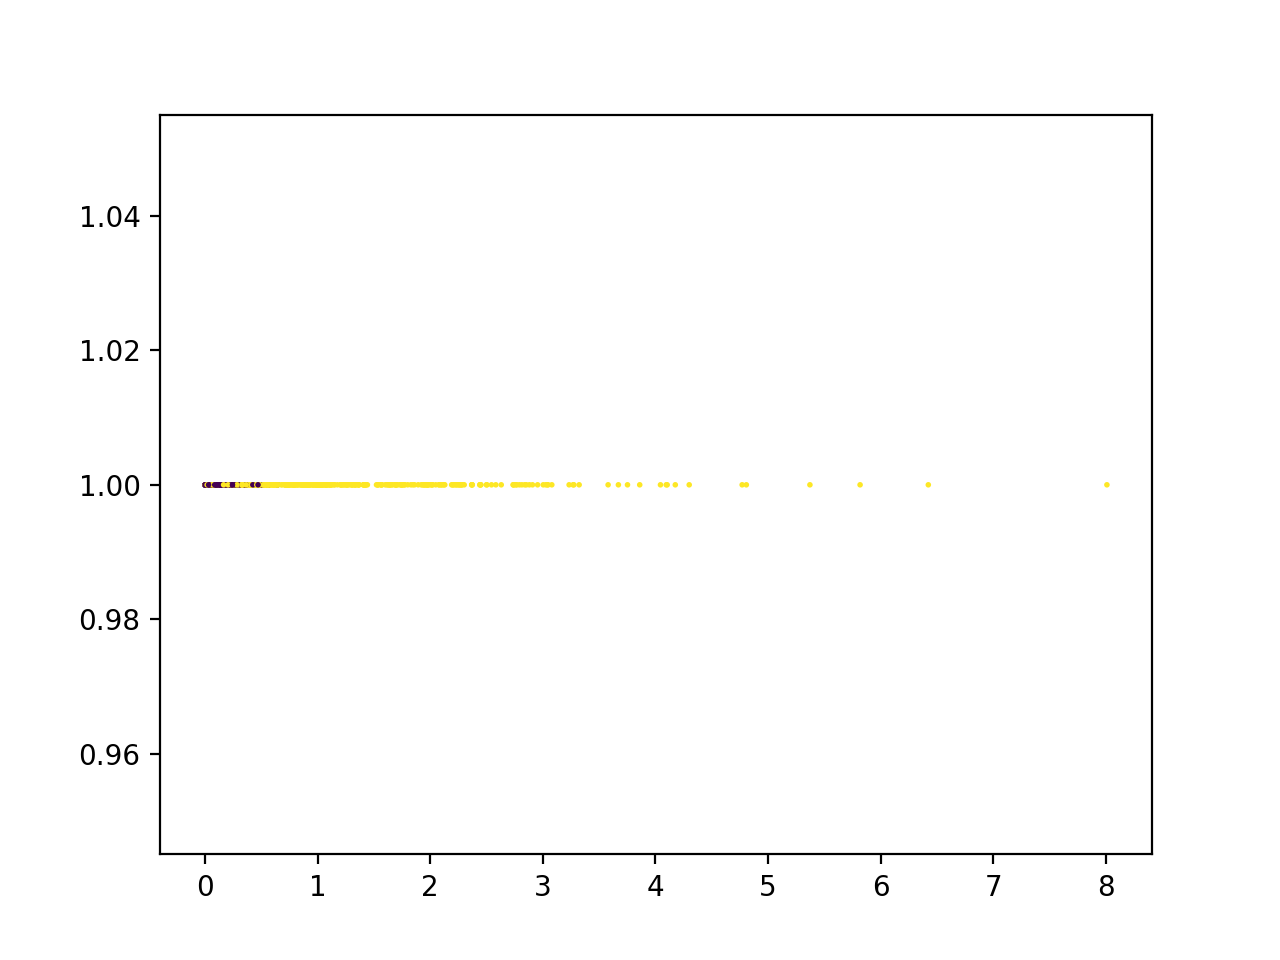

<function matplotlib.pyplot.show(block=None)>

In [48]:
plt.figure()
plt.scatter(data, np.ones(N), s=1, c=labels)
plt.show

## EM

$p(x_n|s_n=0, \theta) = \frac{1}{\lambda_0}e^{-\frac{x_n}{\lambda_0}}$ 

$p(x_n|s_n=1, \theta) = \frac{1}{\lambda_1}e^{-\frac{x_n}{\lambda_1}}$

$p(s_n=0| \theta) = \rho$

### E-Step
First we need to find the posterior of our latent membership distribution for fixed parameter values:

$q_0(s_n) = p(s_n=0|x_n, \theta)$

Therefore 

$q_0(s_n) \propto p(x_n|s_n=0, \theta)p(s_n=0|\theta) \propto \frac{\rho}{\lambda_0}e^{-\frac{x_n}{\lambda_0}}$

Utilising the fact that there are only two discrete states for $s$ we can write:

$q_0(s_n) = \frac{p(x_n|s_n=0, \theta)p(s_n=0|\theta)}{p(x_n|s_n=0, \theta)p(s_n=0|\theta) + p(x_n|s_n=1, \theta)p(s_n=1|\theta)} = \frac{r_0}{r}$

$q_0(s_n) = \frac{r_1}{r}$

$r = r_0 + r_1 = p(x_n|s_n=0, \theta)p(s_n=0|\theta) + p(x_n|s_n=1, \theta)p(s_n=1|\theta)$

<IPython.core.display.Javascript object>


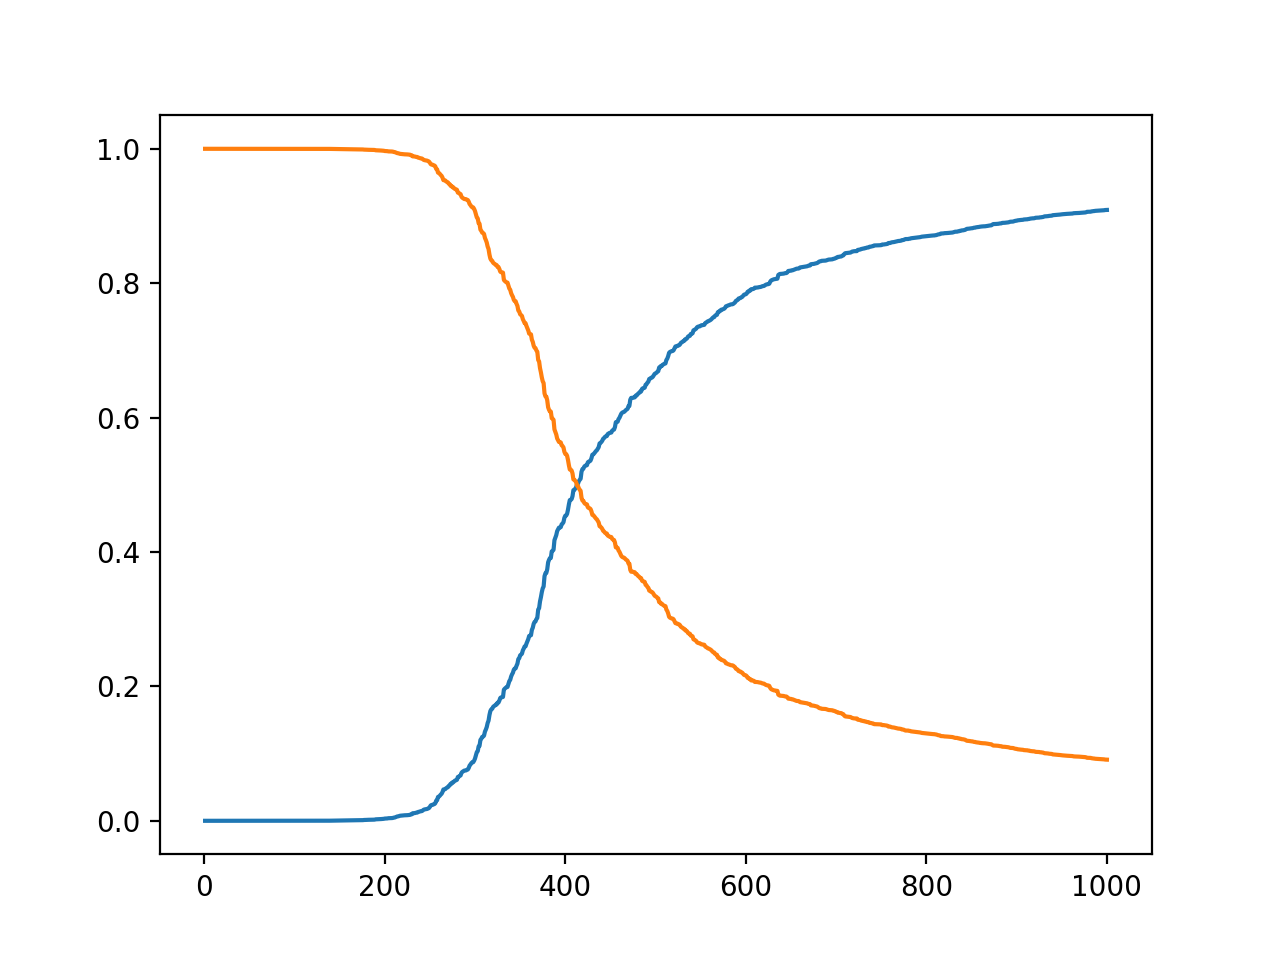

In [9]:
def Estep(x, l0, l1, rho):
    r0 = rho * 1/l0 * np.exp(-x/l0)
    r1 = (1-rho) * 1/l1 * np.exp(-x/l1)
    r = r0 + r1
    return r0/r, r1/r

q0_test, q1_test = Estep(data, lambda0_true, lambda1_true, rho_true)
plt.figure()
plt.plot(np.linspace(1,N,N), np.sort(q0_test))
plt.plot(np.linspace(1,N,N), np.sort(q1_test)[::-1])
plt.show()

### M-step

In the M-step we maximise $\mathop{\mathbb{E}}_{q(s)}\sum_n \log p(x_n, s_n|\theta) = J$ 

with $q(s)$ held constant:

$\mathop{\mathbb{E}}_{q(s)}\log p(x_n, s_n|\theta) = \sum_n \sum_{s \in \{0,1\}} \log p(x_n| s_n, \theta) + \log p(s_n| \theta)$

This is:

$\max J = \max\sum_n q_0(s_n) \bigr[ \log (\frac{1}{\lambda_0}) -\frac{x_n}{\lambda_0} + log(\rho) \bigr] + q_1(s_n) \bigr[ \log (\frac{1}{\lambda_1}) -\frac{x_n}{\lambda_1} + log(1-\rho) \bigr]$

Therefore:

$\frac{\partial J}{\partial \rho}= \sum_n q_0(s_n) \frac{1}{\rho} - \sum_n q_1(s_n) \frac{1}{1-\rho} = 0$

$\rho^{(new)} = \frac{\sum_n q_0(s_n)}{\sum_n q_0(s_n) + q_1(s_n)} = \frac{\sum_n r_0(s_n)}{\sum_n r_0(s_n) + r_1(s_n)}$

$\frac{\partial J}{\partial \lambda_0}= \sum_n q_0(s_n) \bigr[ -\lambda_0 + \frac{x_n}{\lambda_0^2}\bigr]=0$

$\lambda_0^{(new)} = \frac{\sum_n q_0(s_n)x_n}{\sum_n q_0(s_n)}$

$\lambda_1^{(new)} = \frac{\sum_n q_1(s_n)x_n}{\sum_nq_1(s_n)}$

In [42]:
rho_0 = 0.1
lambda_0_0 = 0.5
lambda_1_0 = 0.5

In [43]:
def Mstep(data, q0, q1):
    rho_updated = np.sum(q0) / np.sum(q0+q1)
    lambda_0_updated = np.sum(q0 * data)/np.sum(q0)
    lambda_1_updated = np.sum(q1 * data)/np.sum(q1)
    return rho_updated, lambda_0_updated, lambda_1_updated

In [44]:
def EM(inputs, l0, l1, rho, its):
    rho_loc = rho
    l0_loc = l0
    l1_loc = l1
    for i in range(its):
        q0_loc, q1_loc = Estep(inputs, l0_loc, l1_loc, rho_loc)
        rho_loc, l0_loc, l1_loc = Mstep(inputs, q0_loc, q1_loc)
        
    return rho_loc, l0_loc, l1_loc

In [45]:
rho_ML, l0_ML, l1_ML = EM(data, lambda_0_0, lambda_1_0, rho_0, 1000)

In [46]:
rho_ML, l0_ML, l1_ML

(0.5071980376224066, 0.09915938278638858, 0.9837593692577081)